In [1]:
using Revise

In [9]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

In [68]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7022...
zmq_url=tcp://127.0.0.1:6022
web_url=http://127.0.0.1:7022/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000013872d50, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x00000000106cec50, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000128079f0, 172, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x00000000106cec50, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000128079f0, 172, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7022/static/", "tcp://127.0.0.1:6022", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("rh_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x2f, 0x72, 0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("after_core_to_rh_rotation"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x72, 0x6f, 0x74, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict("geometry_4"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rh"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x2f, 0x72, 0x68], Dict("after_core_to_rh_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_5"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String,MeshCat.SceneTrees.SceneNode}()))))))),"after_floating_base"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rf_dummy"=>MeshCat.SceneTrees.SceneNode

In [69]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params)
net, loss = LearningMPC.interval_net([22, 64, 64, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

(::MPCController) (generic function with 1 method)

In [70]:
x0 = nominal_state(robot)
set_velocity!(x0, findjoint(robot.mechanism, "floating_base"), [0.5, 0, 0])
set_configuration!(x0, findjoint(robot.mechanism, "floating_base"), [0.5, 1.05, 0])
results = LCPSim.simulate(x0, lqr_mpc_controller, environment(robot), params.Δt, 100, params.lcp_solver);

In [72]:
playback(mvis, results, params.Δt)

In [73]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample}, σv=1.0)
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, σv)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[3] > π/4 || configuration(x)[3] < -π/4);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

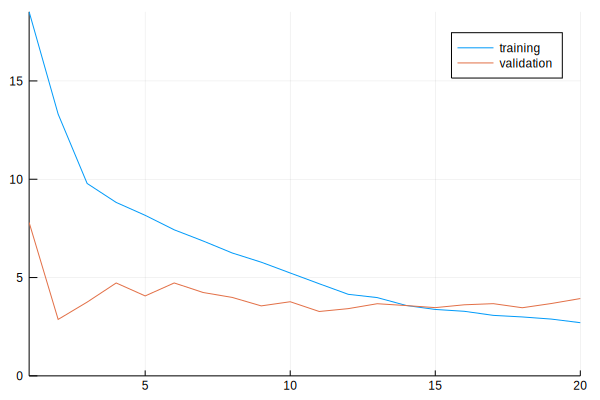

  0.572025 seconds (484.61 k allocations: 42.184 MiB, 2.87% gc time)


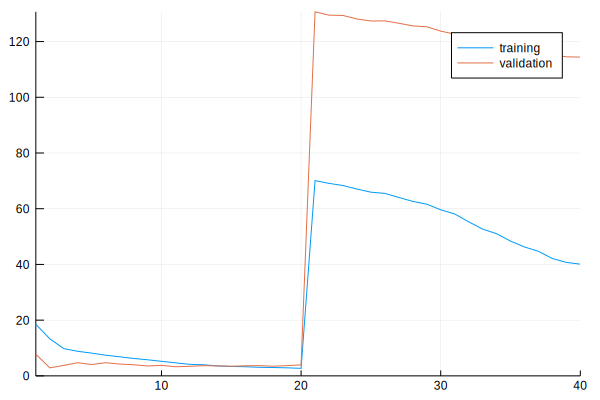

  0.886561 seconds (851.28 k allocations: 75.091 MiB, 2.67% gc time)


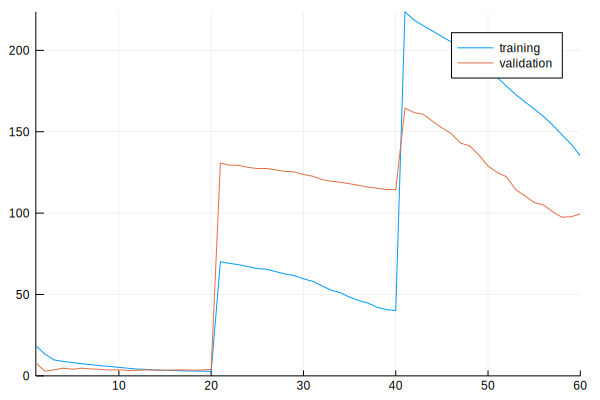

  1.452043 seconds (1.27 M allocations: 111.960 MiB, 2.52% gc time)


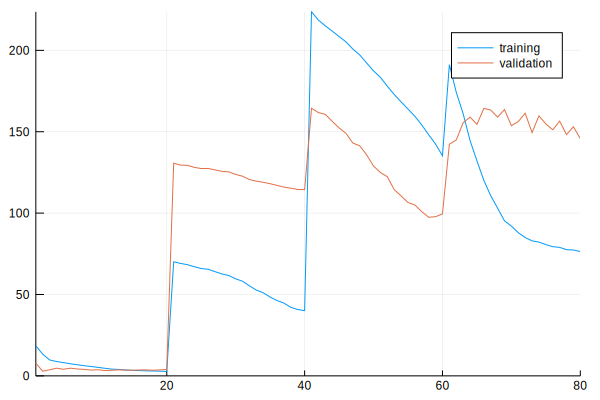

  1.681112 seconds (1.56 M allocations: 137.024 MiB, 3.62% gc time)


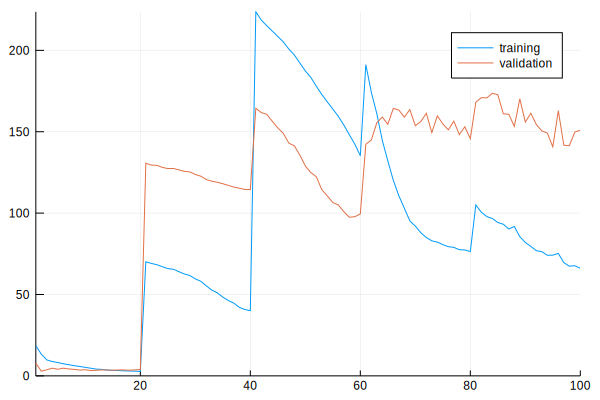

  1.975330 seconds (1.93 M allocations: 169.756 MiB, 2.76% gc time)


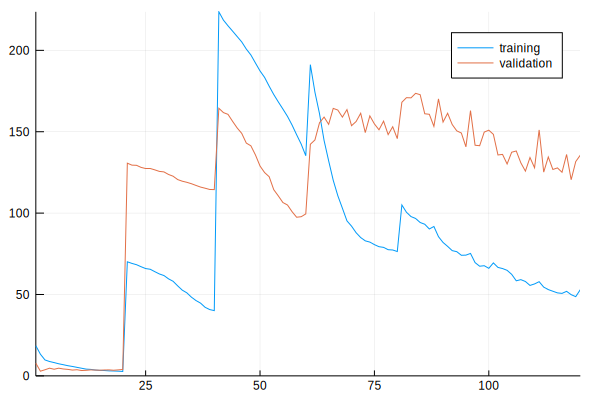

  2.083286 seconds (2.01 M allocations: 177.285 MiB, 3.20% gc time)


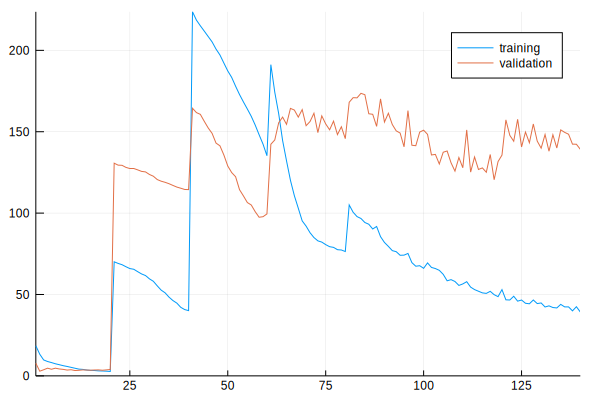

  2.232096 seconds (2.12 M allocations: 186.445 MiB, 3.16% gc time)


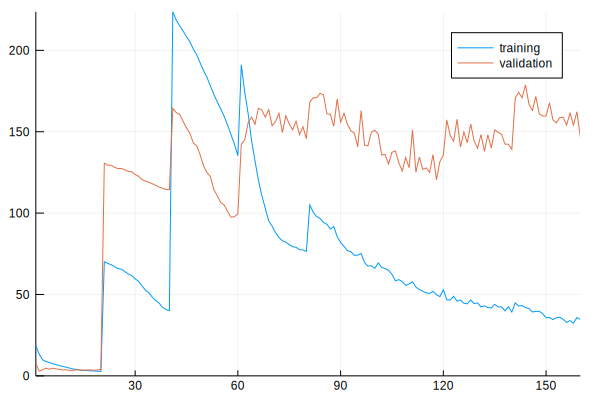

  2.389986 seconds (2.20 M allocations: 194.344 MiB, 2.97% gc time)


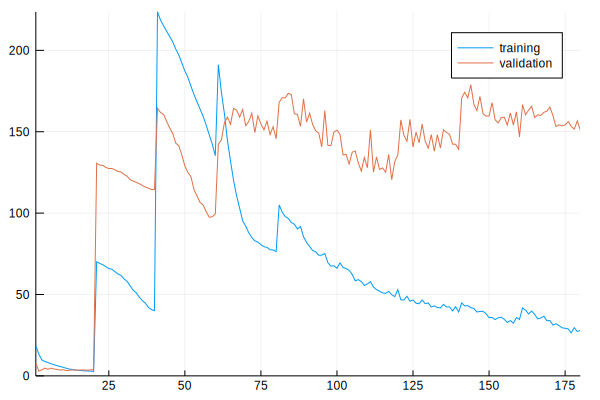

  2.517305 seconds (2.40 M allocations: 211.365 MiB, 2.95% gc time)


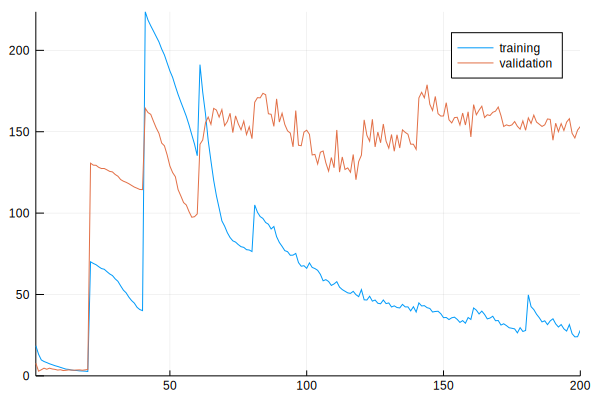

  2.824984 seconds (2.59 M allocations: 228.010 MiB, 2.80% gc time)


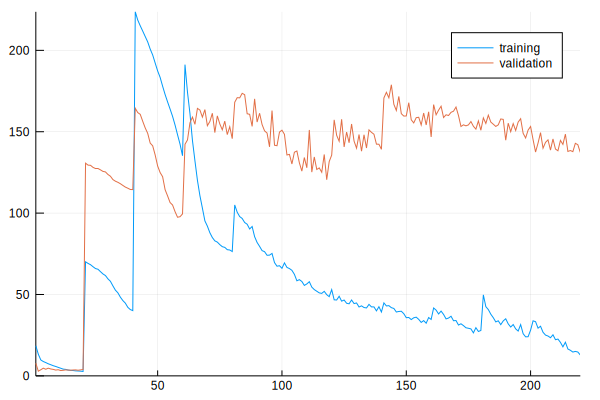

  3.105669 seconds (2.72 M allocations: 238.847 MiB, 3.31% gc time)


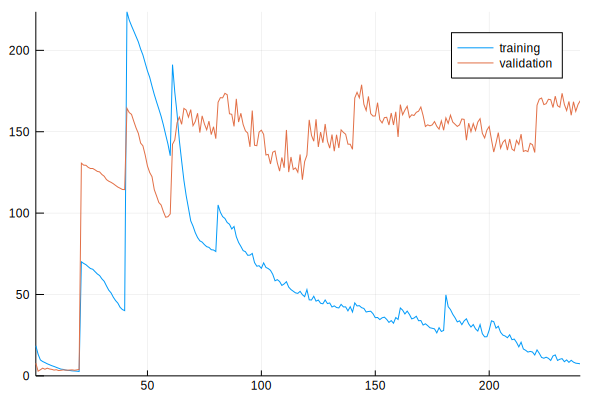

  2.994219 seconds (2.84 M allocations: 250.000 MiB, 3.45% gc time)


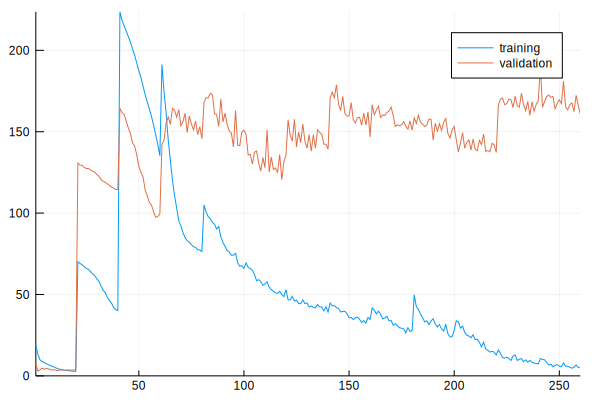

  3.038202 seconds (2.93 M allocations: 257.909 MiB, 3.16% gc time)


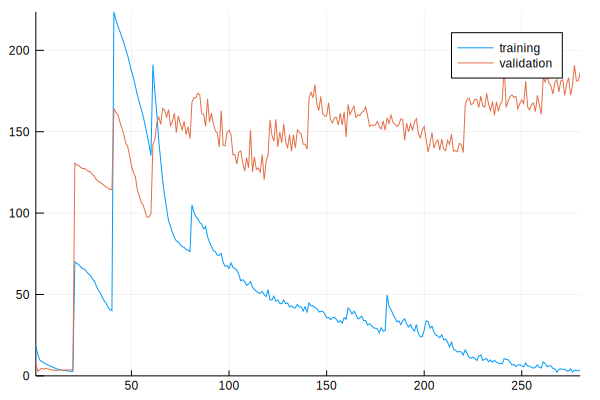

  3.102299 seconds (3.04 M allocations: 267.943 MiB, 3.04% gc time)


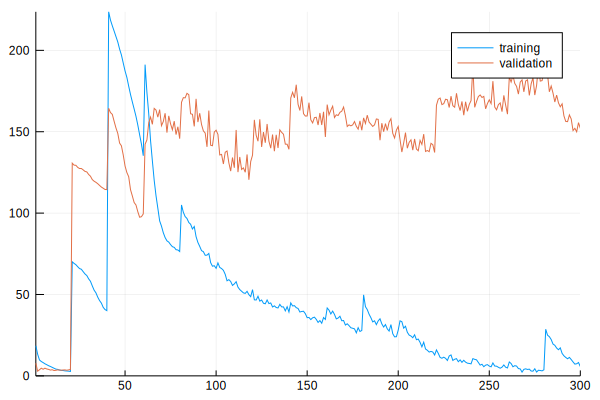

  3.364419 seconds (3.23 M allocations: 285.000 MiB, 3.12% gc time)


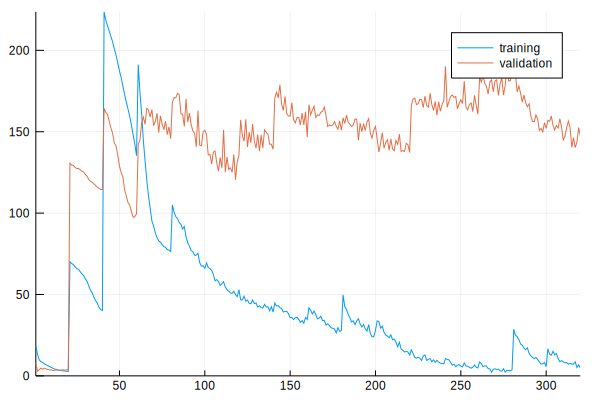

  3.538078 seconds (3.46 M allocations: 305.414 MiB, 2.45% gc time)


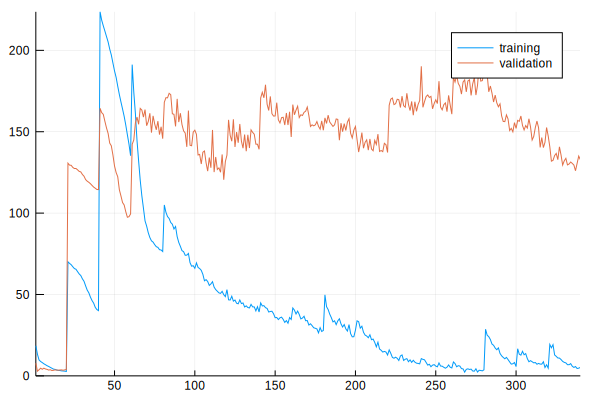

  3.769139 seconds (3.66 M allocations: 323.214 MiB, 2.94% gc time)


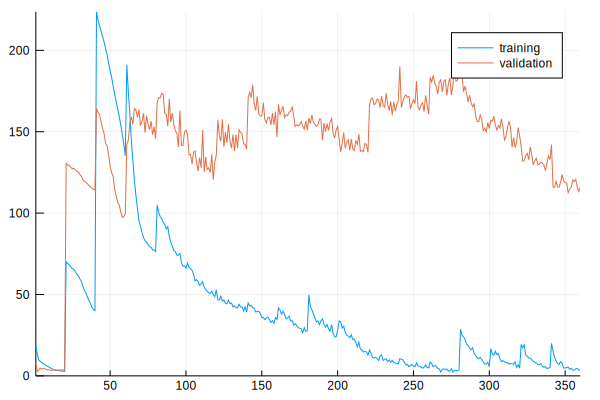

  4.062716 seconds (4.00 M allocations: 353.016 MiB, 3.27% gc time)


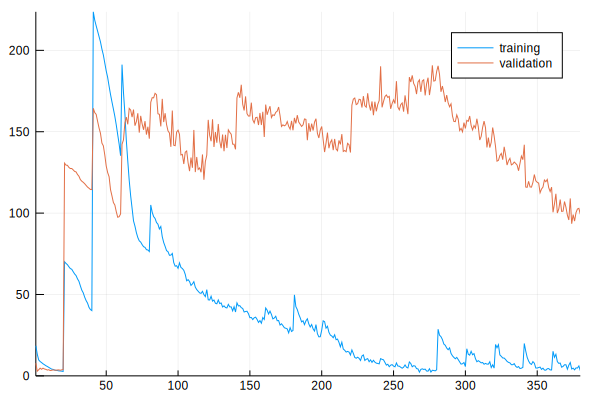

  4.545574 seconds (4.37 M allocations: 384.916 MiB, 3.02% gc time)


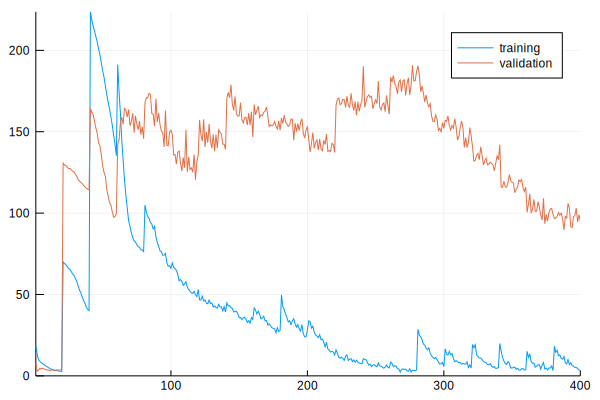

  4.948996 seconds (4.76 M allocations: 419.647 MiB, 3.28% gc time)


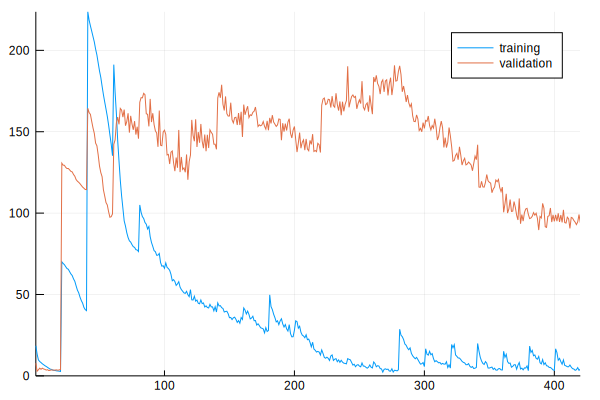

  5.249653 seconds (5.19 M allocations: 457.580 MiB, 2.70% gc time)


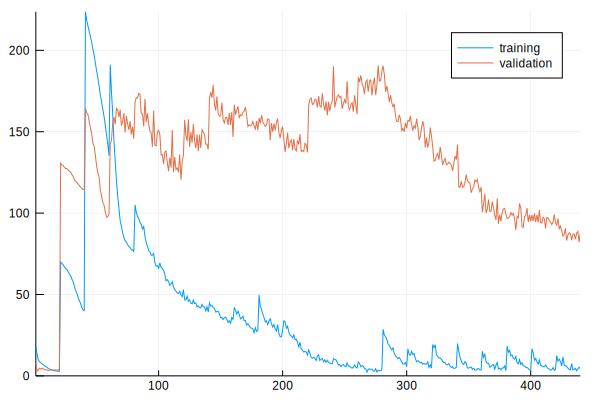

  5.997890 seconds (5.74 M allocations: 506.257 MiB, 3.20% gc time)


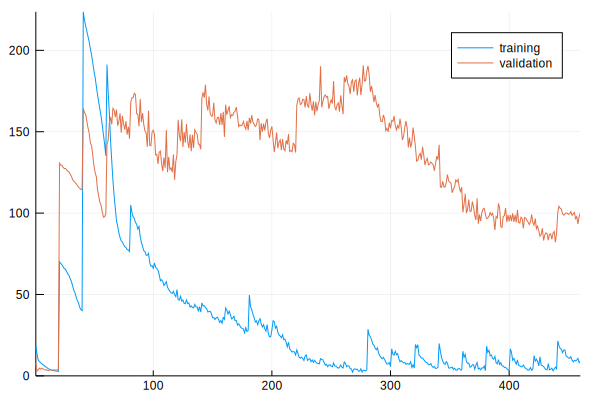

  7.058652 seconds (6.27 M allocations: 552.758 MiB, 2.77% gc time)


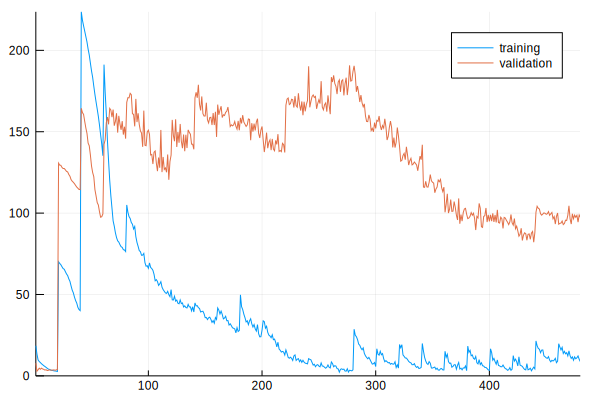

  7.119401 seconds (6.76 M allocations: 595.813 MiB, 2.75% gc time)


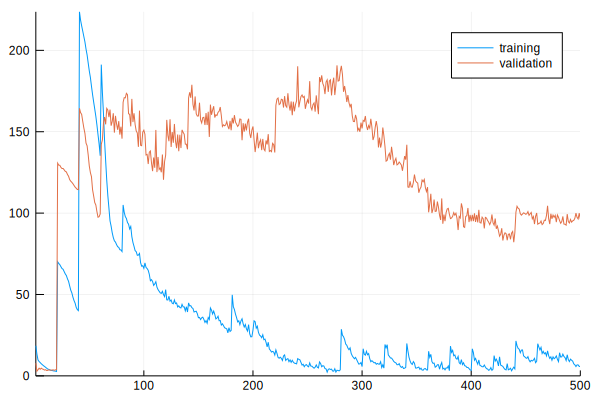

  7.439063 seconds (7.24 M allocations: 638.074 MiB, 2.79% gc time)


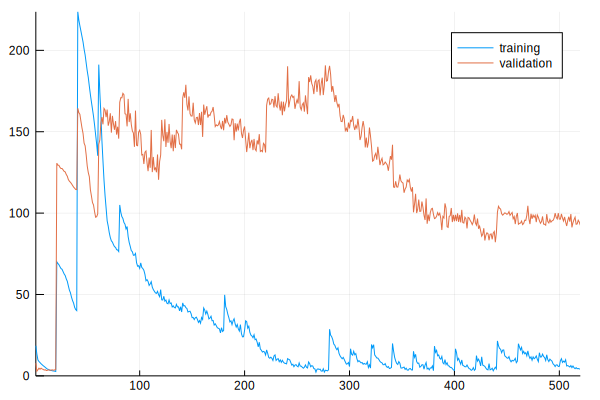

  7.853573 seconds (7.73 M allocations: 681.785 MiB, 3.20% gc time)


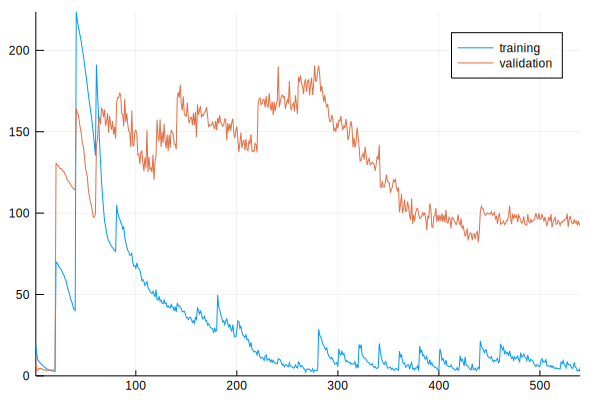

  8.354319 seconds (8.21 M allocations: 724.030 MiB, 3.43% gc time)


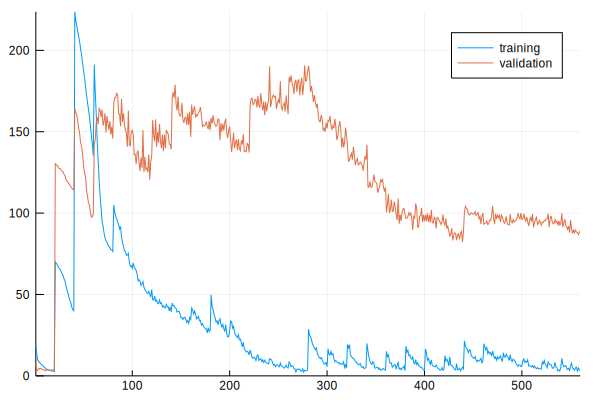

  8.625028 seconds (8.60 M allocations: 757.968 MiB, 2.63% gc time)


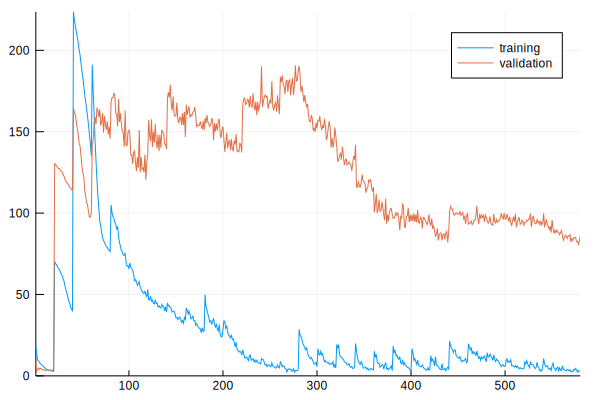

  9.169942 seconds (8.91 M allocations: 786.001 MiB, 3.19% gc time)


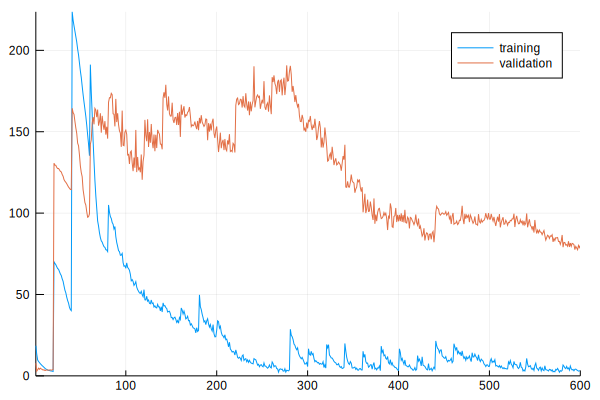

  9.712094 seconds (9.30 M allocations: 820.450 MiB, 2.74% gc time)


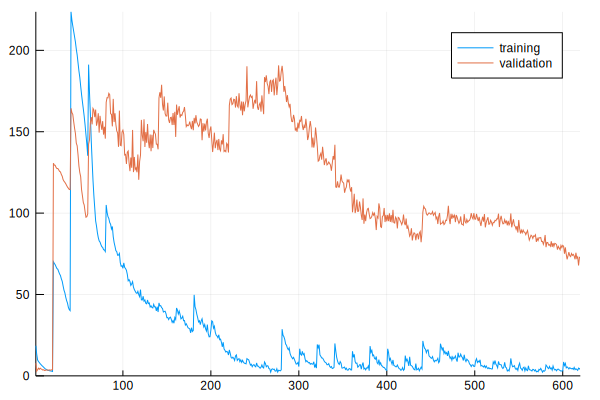

  9.742215 seconds (9.78 M allocations: 862.712 MiB, 2.61% gc time)


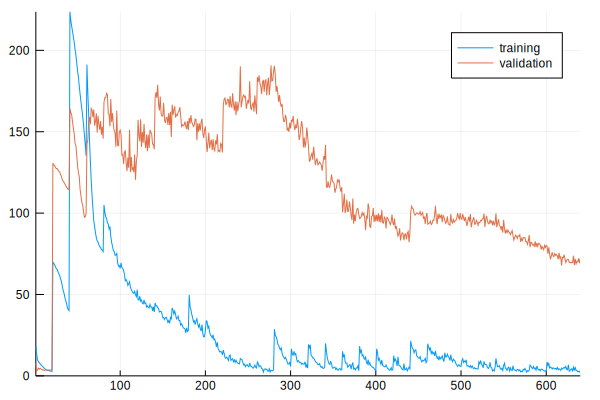

 10.118191 seconds (10.12 M allocations: 892.461 MiB, 2.86% gc time)


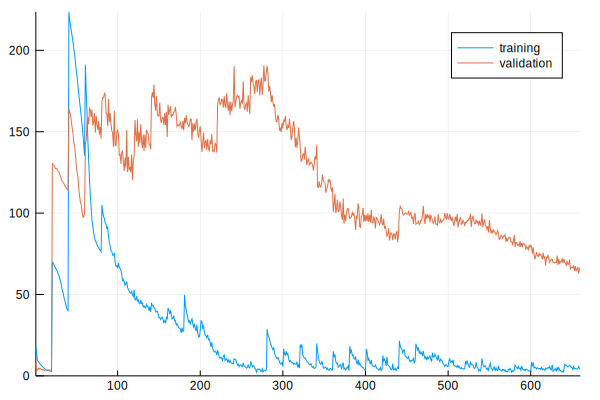

 10.460223 seconds (10.41 M allocations: 918.304 MiB, 3.34% gc time)


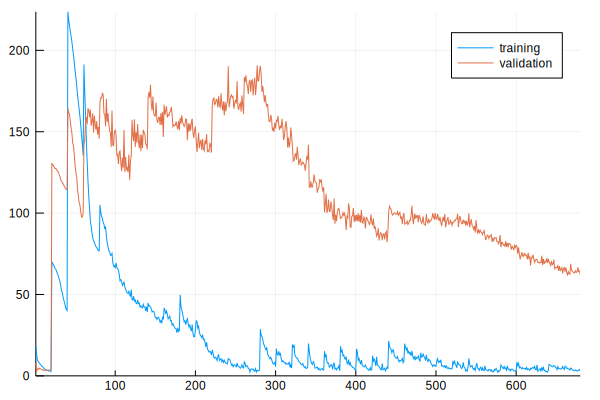

 11.035756 seconds (10.89 M allocations: 961.078 MiB, 2.70% gc time)


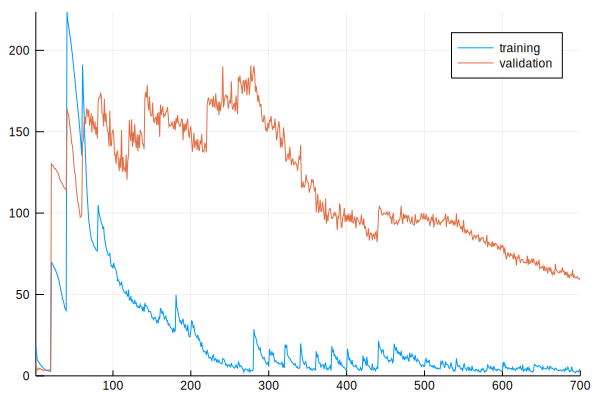

 11.667862 seconds (11.46 M allocations: 1010.691 MiB, 3.39% gc time)


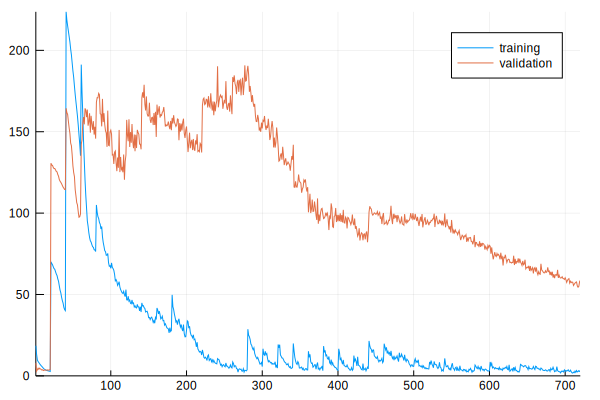

 12.068650 seconds (11.91 M allocations: 1.026 GiB, 2.72% gc time)


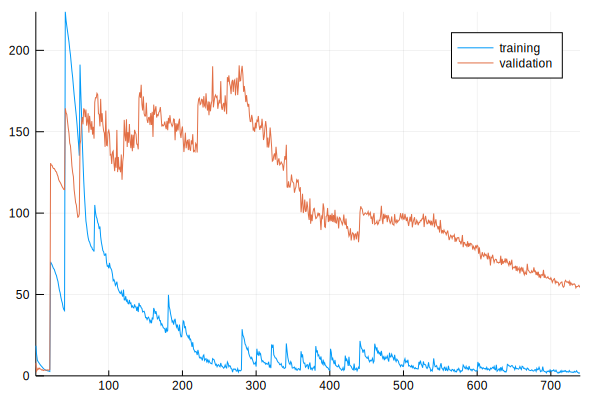

 12.393737 seconds (12.25 M allocations: 1.055 GiB, 2.95% gc time)


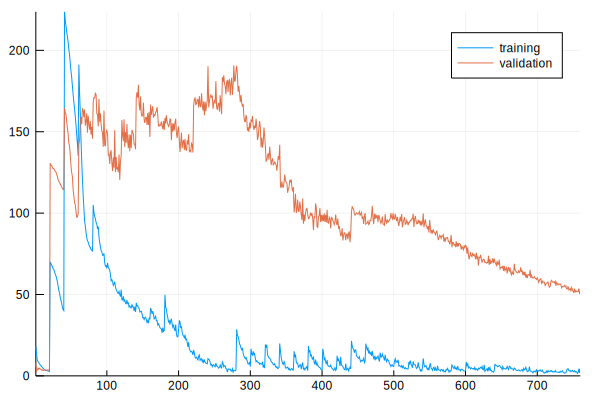

 12.723503 seconds (12.53 M allocations: 1.080 GiB, 3.29% gc time)


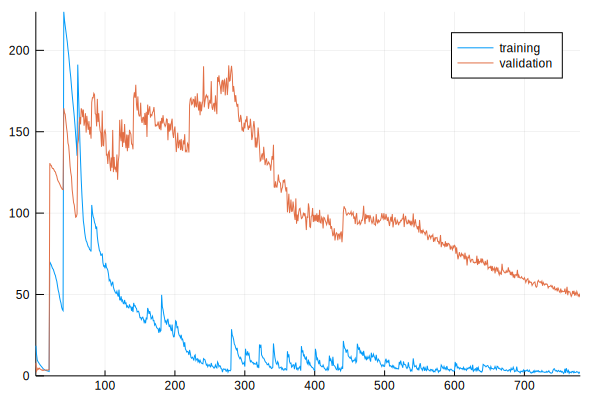

 13.211739 seconds (13.02 M allocations: 1.121 GiB, 3.31% gc time)


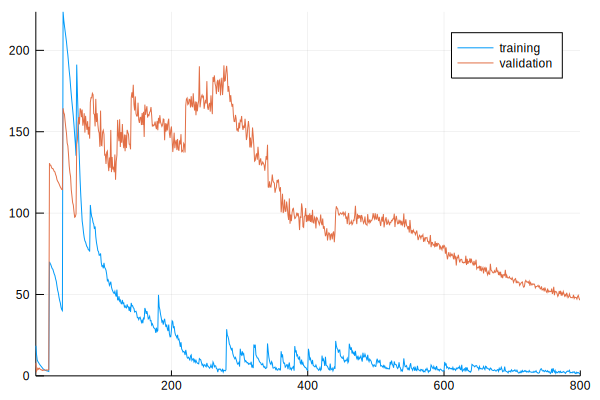

 13.792678 seconds (13.43 M allocations: 1.157 GiB, 2.85% gc time)


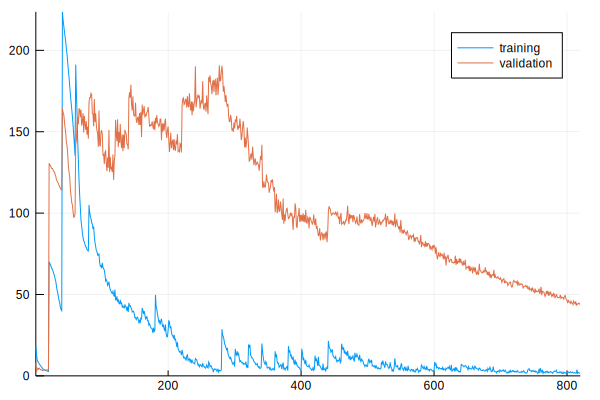

 13.850122 seconds (13.85 M allocations: 1.193 GiB, 3.06% gc time)


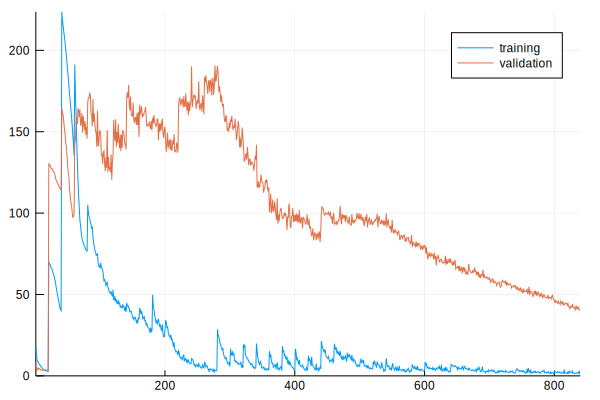

 14.226681 seconds (14.32 M allocations: 1.234 GiB, 2.78% gc time)


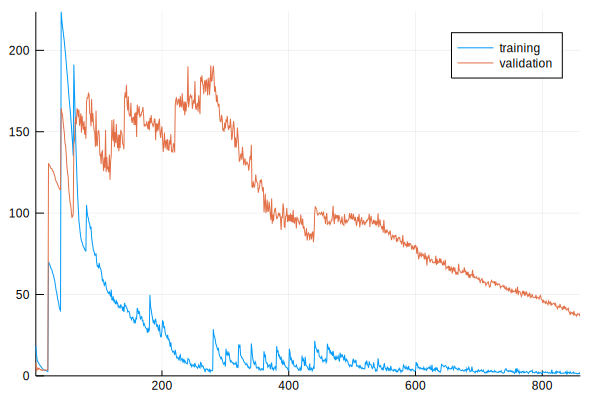

 15.037744 seconds (14.79 M allocations: 1.273 GiB, 2.51% gc time)


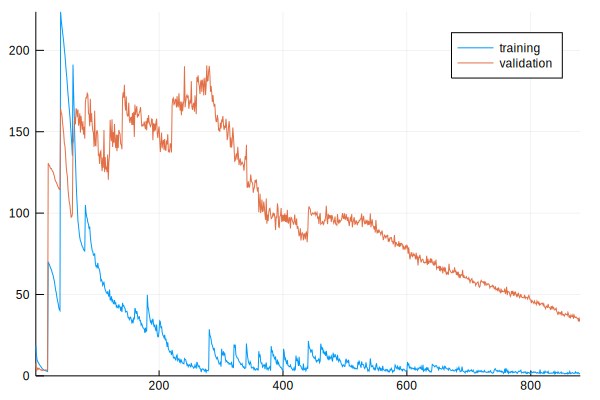

 15.585893 seconds (15.29 M allocations: 1.316 GiB, 3.36% gc time)


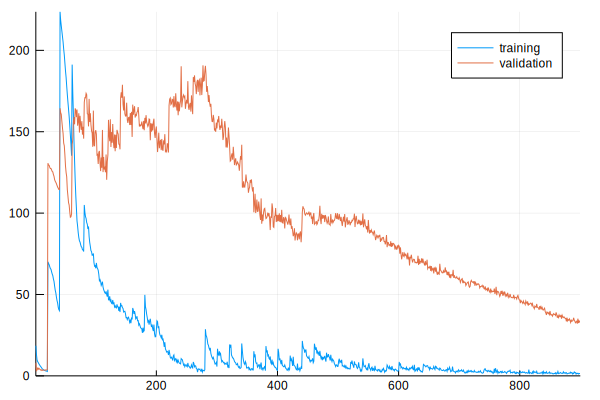

 15.903559 seconds (15.72 M allocations: 1.354 GiB, 3.20% gc time)


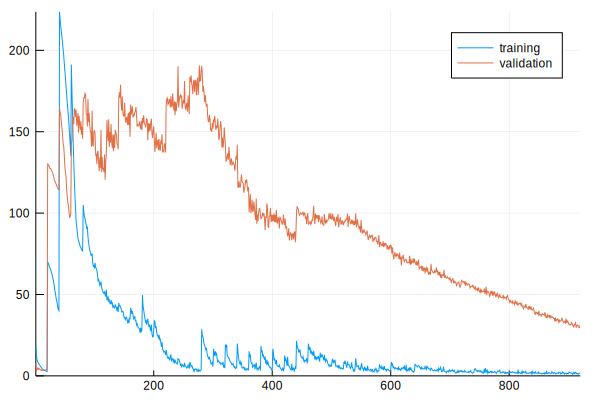

 16.388087 seconds (16.23 M allocations: 1.398 GiB, 3.36% gc time)


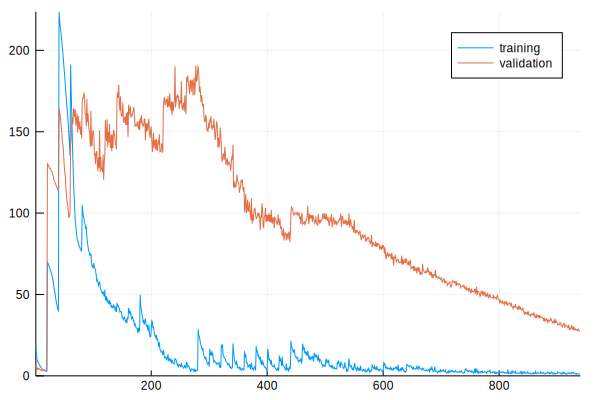

 16.807595 seconds (16.69 M allocations: 1.438 GiB, 3.49% gc time)


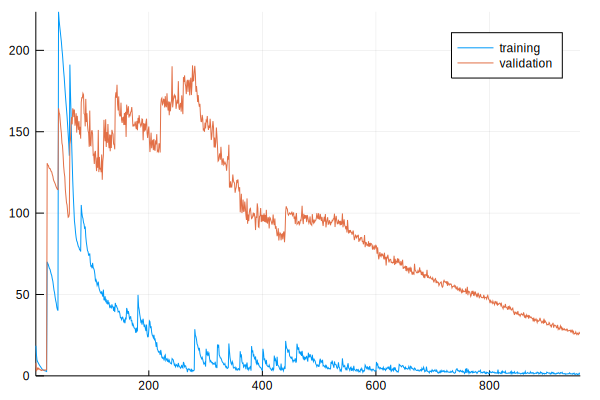

 17.320349 seconds (17.14 M allocations: 1.477 GiB, 3.30% gc time)


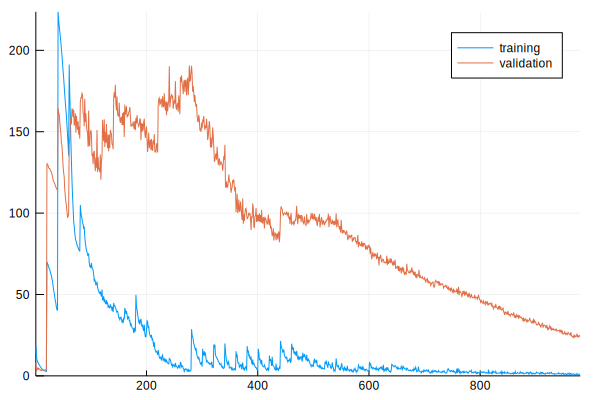

 17.882298 seconds (17.64 M allocations: 1.519 GiB, 2.82% gc time)


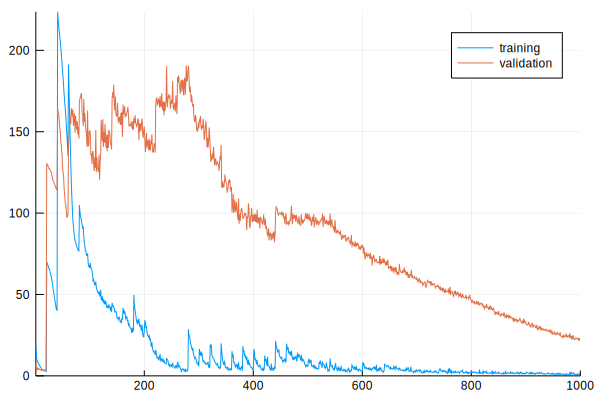

 18.413919 seconds (18.14 M allocations: 1.561 GiB, 3.14% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 6:30:00


In [74]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

N_iter = 50
σv = 3.0

@showprogress for i in 1:N_iter
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data, i / N_iter * σv)
    collect_into!(dataset.validation_data, i / N_iter * σv)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    filter!(all_training_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    filter!(all_validation_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    
    @time for i in 1:20
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("boxatlas.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [78]:
x0 = nominal_state(robot)
velocity(x0) .= randn(num_velocities(x0))
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 200, params.lcp_solver);

In [79]:
set_configuration!(mvis, configuration(results[1].state))

In [82]:
playback(mvis, results, params.Δt)